In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

## Reducción de dimensionalidad para tareas de clasificación

In [8]:
mnist = pd.read_csv("data/mnist1.5k.csv.gz", compression="gzip", header=None).values
d=mnist[:,1:785]
c=mnist[:,0]
print "dimension de las imagenes y las clases", d.shape, c.shape

dimension de las imagenes y las clases (1500, 784) (1500,)


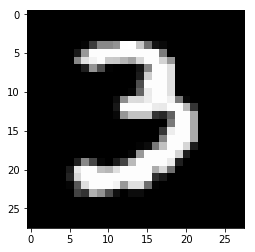

In [10]:
plt.imshow(d[9].reshape(28,28), cmap=plt.cm.gray)


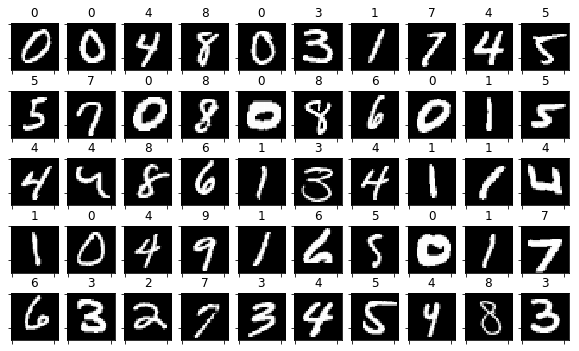

In [9]:
perm = np.random.permutation(range(d.shape[0]))[0:50]
random_imgs   = d[perm]
random_labels = c[perm] 
fig = plt.figure(figsize=(10,6))
for i in range(random_imgs.shape[0]):
    ax=fig.add_subplot(5,10,i+1)
    plt.imshow(random_imgs[i].reshape(28,28), interpolation="nearest", cmap = plt.cm.Greys_r)
    ax.set_title(int(random_labels[i]))
    ax.set_xticklabels([])
    ax.set_yticklabels([])

## Principal Component Analysis

In [23]:
from sklearn.decomposition import PCA

mnist = pd.read_csv("data/mnist1.5k.csv.gz", compression="gzip", header=None).values
X=mnist[:,1:785]
y=mnist[:,0]

pca = PCA(n_components=60)
Xp = pca.fit_transform(X)


### obtenemos los componentes principales

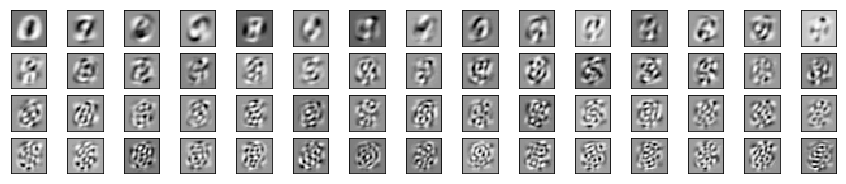

In [24]:
cols=20
plt.figure(figsize=(15,3))
for i in range(len(pca.components_)):
    plt.subplot(np.ceil(len(pca.components_)/15.),15,i+1)
    plt.imshow((pca.components_[i].reshape(28,28)), cmap = plt.cm.Greys_r)
    plt.xticks([]); plt.yticks([])

### verificamos la reconstrucción con los componentes principales

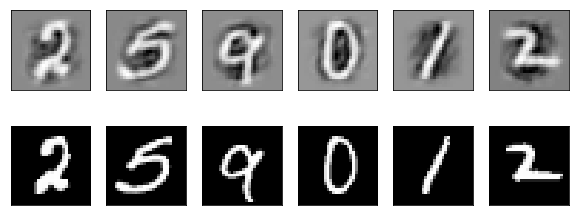

In [25]:
plt.figure(figsize=(10,6))
for i in range(6):
    plt.subplot(3,6,i+1)
    k = np.random.randint(len(X))
    plt.imshow((np.sum((pca.components_*Xp[k].reshape(-1,1)), axis=0)).reshape(28,28), cmap=plt.cm.Greys_r)
    plt.xticks([]); plt.yticks([])
    plt.subplot(3,6,6+i+1)
    plt.imshow(X[k].reshape(28,28), cmap=plt.cm.Greys_r)
    plt.xticks([]); plt.yticks([])

### clasificación en el nuevo espacio de representación

In [30]:
Xp.shape

AttributeError: 'PCA' object has no attribute 'shape'

In [31]:
from sklearn.cross_validation import cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier

for i in range(30,40):
    pca = PCA(n_components=i)
    pca.fit(X)
    Xp = pca.transform(X)
    print i
    print np.mean(cross_val_score(RandomForestClassifier(), X,y, cv=5 ))
    print np.mean(cross_val_score(RandomForestClassifier(), Xp,y, cv=5 ))

30
0.8381281960562774
0.7634310585416872
31
0.8333508538879402
0.7720562264890264
32
0.8255756246867204
0.7807001522605103
33
0.8141199277152682
0.7685911278681037
34
0.8400288177221393
0.7739862187789498
35
0.8007968762694244
0.7838394627582594
36
0.8102342661085398
0.7714077919789087
37
0.8154424768727839
0.777969218445426
38
0.8202062514384068
0.7840318000625981
39
0.8274234417328199
0.7600805904724296


### observa la nueva representación de la primera imagen

In [17]:
X[0]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0, 188, 255,  94,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0, 191, 250, 253,  93,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   

In [18]:
Xp[0]

array([-630.21531389,  730.97102721, -103.8003352 ,  -96.74972755,
       -147.33798953, -469.2616089 , -411.86645673, -603.64390476,
        163.46361559, -244.03469555, -264.6911939 ,   -7.50384097,
        -93.39750362, -315.31430796,  299.18097556,   43.28685233,
        -14.66223845,  373.48460482,  173.24314302,  -69.4087668 ,
         87.64597073, -271.77939069,   32.25158057,   -2.67012871,
        146.2456632 , -194.55725077,   -6.74441307, -130.6973673 ,
        279.14342437,  -79.75180857,  -44.83145183,  112.91441789,
         23.96756897,  172.05834196,  113.21443299, -136.91209533,
       -102.93483707,   14.83075052, -243.59692986,   85.76538743,
         53.66593864,   -6.31610246, -127.3782139 ,  161.16310744,
         57.58665065,  -46.79638369,   24.98875749,   44.22912936,
       -114.9167238 ,   23.12911747,  112.52600614,  -72.70771636,
        130.89638355,   18.52668112, -104.79066585,   20.65809744,
         65.7617264 ,   92.35916853,  -47.6233543 ,   -1.04250

### pipelines

debemos de tener cuidado cuando usamos transformaciones en clasificación, ya que tenemos que ajustarlas (de manera no supervisada) sólo con los datos de entrenamiento

In [23]:
from sklearn.pipeline import Pipeline
pip = Pipeline([("PCA", PCA(n_components=60)), ("gaussian", GaussianNB())])
print np.mean(cross_val_score(pip, X,y, cv=5 ))

0.8434577988737979


## Singular Value Decomposition

$$\mathbf{X} = \mathbf{U}\mathbf{\Sigma}\mathbf{V}^*$$ 

donde:

- $\mathbf{X}$ son nuestros datos
- $\mathbf{U}$ es unitaria (sus columnas y filas son ortonormales, forman una base)
- $\mathbf{V}^*$ es unitaria (sus columnas y filas son ortonormales, forman una base)

In [33]:
U,s,V = np.linalg.svd(X)

In [34]:
U.shape, s.shape, V.shape

((1500, 1500), (784,), (784, 784))

reconstruimos la matriz diagonal s

In [35]:
s = np.diag(s)
s = np.vstack([s, np.zeros((U.shape[0]-s.shape[0], s.shape[1]))])

verificamos las propiedades SVD

In [36]:
print "checking U is unitary:         ", np.allclose(U.dot(U.T), np.eye(U.shape[0]))
print "checking rows in U are unit:   ", np.allclose(np.linalg.norm(U, axis=1), np.ones(U.shape[0]))
print "checking columns in U are unit:", np.allclose(np.linalg.norm(U, axis=0), np.ones(U.shape[1]))
print "checking V is unitary:         ", np.allclose(V.T.dot(V), np.eye(V.shape[0]))
print "checking rows in V are unit:   ", np.allclose(np.linalg.norm(V, axis=1), np.ones(V.shape[0]))
print "checking columns in V are unit:", np.allclose(np.linalg.norm(V, axis=0), np.ones(V.shape[1]))
print "checking X reconstruction:     ", np.allclose(U.dot(s).dot(V), X)


checking U is unitary:          True
checking rows in U are unit:    True
checking columns in U are unit: True
checking V is unitary:          True
checking rows in V are unit:    True
checking columns in V are unit: True
checking X reconstruction:      True


$\Sigma$ viene ordenada, y cada coeficiente cuantifica cuanto contribuye cada base en $V$ a la variabilidad de los datos originales.

Text(0,0.5,u'component value')

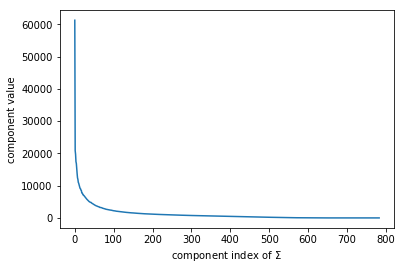

In [37]:
plt.plot(np.diagonal(s))
plt.xlabel("component index of $\Sigma$");
plt.ylabel("component value")

In [42]:
ds = np.diagonal(s)
ds = ds/np.sum(ds)

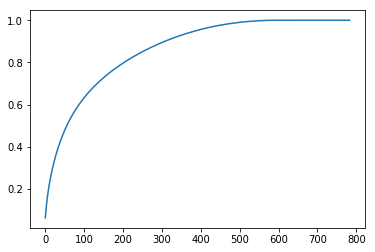

In [43]:
plt.plot(np.cumsum(ds))

### obseva que los componentes de PCA y $V^*$ de SVD son los mismos

aunque a veces vengan con signo distinto

In [108]:
Xm = X-np.mean(X, axis=0)
U,s,V = np.linalg.svd(Xm)
pca = PCA(n_components=60)
pca.fit(Xm);

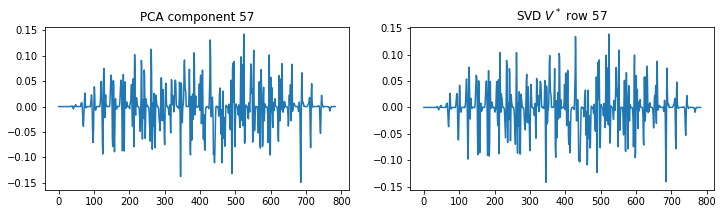

In [110]:
i = np.random.randint(pca.n_components)
plt.figure(figsize=(12,3))
plt.subplot(121)
plt.plot(pca.components_[i])
plt.title("PCA component %d"%i)
plt.subplot(122)
plt.title("SVD $V^*$ row %d"%i)
plt.plot(V[i])

por ejemplo siq ueremos preservar solamente los vectores base de SVD que contienen el 40% de la variabilidad


In [125]:
n_components = np.argwhere(np.cumsum(s)/np.sum(s)>.4)[0][0]
print "keeping %d components"%n_components

keeping 39 components


In [126]:
c = V[:n_components]

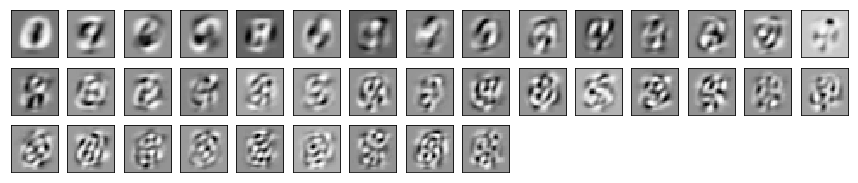

In [127]:
cols=20
plt.figure(figsize=(15,3))
for i in range(len(c)):
    plt.subplot(np.ceil(len(c)/15.),15,i+1)
    plt.imshow((c[i].reshape(28,28)), cmap = plt.cm.Greys_r)
    plt.xticks([]); plt.yticks([])

which correspond to the same components above for PCA.

## Non negative matrix factorization

Descomponemos una matriz $V \in \mathbb{R}_+^{m\times n}$ en el producto $W \times H$, con $W \in \mathbb{R}_+^{m\times r}$ y $H \in \mathbb{R}_+^{r\times n}$ con la restricción de que todo sea positivo ($\in \mathbb{R}_+$), de forma que:

$$V \approx W \times H$$

Las filas de $H$ son los _componentes base_, y se soluciona planteándolo como un problema de optimización matemática con restricciones.

$$\begin{split}
argmin_{W,H}\;& ||V-W\times H||\\
s.t.&\;W,H \in \mathbb{R}_+
\end{split}$$

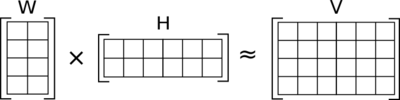

In [9]:
from IPython.display import Image
Image(filename='imgs/nmf.png')

### obtenemos la descomposición

In [45]:
from sklearn.decomposition import NMF
X=mnist[:,1:785]; y=mnist[:,0]

nmf = NMF(n_components=15, init="random")
Xn  = nmf.fit_transform(X)

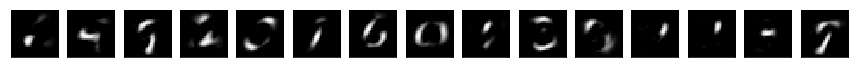

In [46]:
cols=20
plt.figure(figsize=(15,3))
for i in range(len(nmf.components_)):
    plt.subplot(len(nmf.components_)/15,15,i+1)
    plt.imshow(np.abs(nmf.components_[i].reshape(28,28)), cmap = plt.cm.Greys_r)
    plt.xticks([]); plt.yticks([])

In [12]:
Xn[0,:]

array([  0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   1.70975508,   0.13692817,   0.        ,
         8.59060053,  13.69469474,   3.67289201,   8.465359  ,
         0.        ,   0.        ,   0.        ])

### verfiicamos la reconstrucción

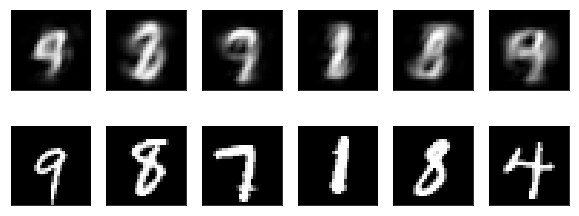

In [13]:
plt.figure(figsize=(10,6))
for i in range(6):
    plt.subplot(3,6,i+1)
    k = np.random.randint(len(X))
    plt.imshow(np.abs(np.sum((nmf.components_*Xn[k].reshape(-1,1)), axis=0)).reshape(28,28), cmap=plt.cm.Greys_r)
    plt.xticks([]); plt.yticks([])
    plt.subplot(3,6,6+i+1)
    plt.imshow(X[k].reshape(28,28), cmap=plt.cm.Greys_r)
    plt.xticks([]); plt.yticks([])

### clasificamos en el nuevo espacio de representación

In [14]:
print np.mean(cross_val_score(GaussianNB(), X,y, cv=5 ))
print np.mean(cross_val_score(GaussianNB(), Xn,y, cv=5 ))

0.591975339782
0.778061858065


### la primera imagen en el nuevo espacio de representación
observa que todos los componentes son positivos

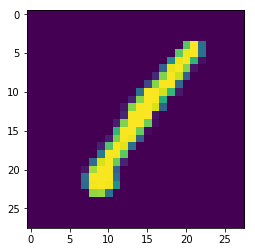

In [49]:
plt.imshow(X[0].reshape(28,28))

In [47]:
Xn[0]

array([9.5628743 , 0.        , 0.        , 0.        , 5.5644166 ,
       4.02343094, 0.        , 0.        , 0.64802081, 0.        ,
       0.        , 0.        , 3.67510476, 3.66235817, 0.        ])

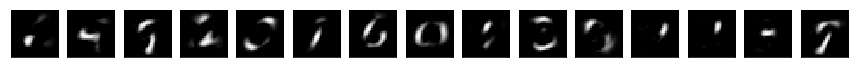

In [50]:
cols=20
plt.figure(figsize=(15,3))
for i in range(len(nmf.components_)):
    plt.subplot(len(nmf.components_)/15,15,i+1)
    plt.imshow(np.abs(nmf.components_[i].reshape(28,28)), cmap = plt.cm.Greys_r)
    plt.xticks([]); plt.yticks([])

## NMF para el reconocimiento de rostros

In [1]:
import pickle
faces = pickle.load( open( "data/faces.pkl", "rb" ) )
faces.shape

(535, 361)

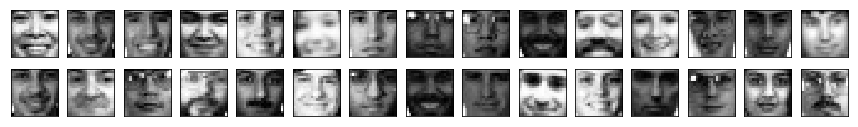

In [4]:
plt.figure(figsize=(15,2))
for i in range(30):
    plt.subplot(2,15,i+1)
    plt.imshow(faces[np.random.randint(len(faces))].reshape(19,19), cmap=plt.cm.Greys_r)
    plt.xticks([]); plt.yticks([])

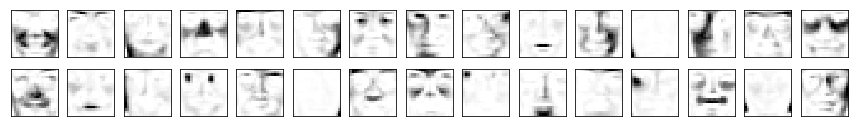

In [19]:
nmf      = NMF(n_components=30, init="random")
faces_n  = nmf.fit_transform(faces)
cols=20
plt.figure(figsize=(15,2))
for i in range(len(nmf.components_)):
    plt.subplot(np.ceil(len(nmf.components_)/15.),15,i+1)
    plt.imshow(np.abs(nmf.components_[i].reshape(19,19)), cmap = plt.cm.Greys)
    plt.xticks([]); plt.yticks([])

forzamos dispersión en los componentes, y extendemos el problema de optimización con la norma $L_1$ en los componentes base.

$$\begin{split}
argmin_{W,H}\;& ||V-W\times H|| + ||H||^2_1\\
s.t.&\;W,H \in \mathbb{R}_+
\end{split}$$

también podríamos forzar dispersión en la nueva representación
$$\begin{split}
argmin_{W,H}\;& ||V-W\times H|| + ||W||^2_1\\
s.t.&\;W,H \in \mathbb{R}_+
\end{split}$$


/opt/anaconda/lib/python2.7/site-packages/sklearn/decomposition/nmf.py:997: DeprecationWarning: Controlling regularization through the sparseness, beta and eta arguments is only available for 'pg' solver, which will be removed in release 0.19. Use another solver with L1 or L2 regularization instead.
  " regularization instead.", DeprecationWarning)


24130.9737149


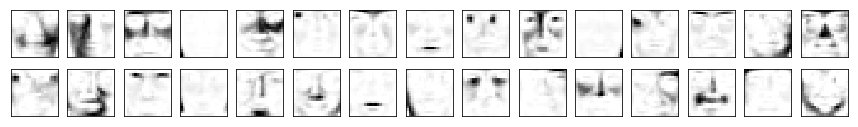

In [20]:
nmf      = NMF(n_components=30, init="nndsvd", sparseness="components", eta=1e5, l1_ratio=1, beta=100.)
faces_n  = nmf.fit_transform(faces)
cols=20
plt.figure(figsize=(15,2))
print np.sum(nmf.components_)
for i in range(len(nmf.components_)):
    plt.subplot(np.ceil(len(nmf.components_)/15.),15,i+1)
    plt.imshow(np.abs(nmf.components_[i].reshape(19,19)), cmap = plt.cm.Greys)
    plt.xticks([]); plt.yticks([])